In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [31]:
raw_data = pd.read_csv('train.csv')
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
features = ['Pclass','Parch','SibSp','Sex']
x = pd.get_dummies(train_data[features])
y = raw_data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [33]:
x_train

,Pclass,Parch,SibSp,Sex_female,Sex_male
815,1,0,0,0,1
877,3,0,0,0,1
193,2,1,1,0,1
523,1,1,0,1,0
634,3,2,3,1,0
...,...,...,...,...,...
835,1,1,1,1,0
192,3,0,1,1,0
629,3,0,0,0,1
559,3,0,1,1,0


In [34]:
y_train

815    0
877    0
193    1
523    1
634    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 801, dtype: int64

## Random Forest Classifier

In [52]:
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
rf_classifier.fit(x_train,y_train)
predictions = rf_classifier.predict(x_test)

## Accuracy Rate

In [39]:
print('The accuracy rate is :',(rf_classifier.score(x_train,y_train)*100).round(3),'% for the training data')

The accuracy rate is : 81.398 % for the training data


In [40]:
print('The accuracy rate is :',(rf_classifier.score(x_test,y_test)*100).round(3),'% for the testing data')

The accuracy rate is : 80.0 % for the testing data


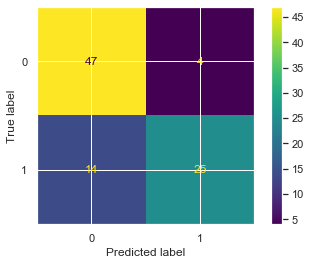

In [60]:
plot_confusion_matrix(rf_classifier, x_test, y_test)
plt.show()